In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
pd.read_csv("C:/Users/DELL/OneDrive/Documents/Book1sql_csv.csv")

,Order ID,Product,Segment,Quantity Ordered,Price Each,Revenue,PAT,Sales YTD,Order Date,Order Time,Purchase Address,City,Postal Code
0,141234,iPhone,Phones,1,$700.00,$700.00,$595.00,"$8,670.29",22/01/2019,21:25,944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,Accessories,1,$14.95,$14.95,$14.20,"$8,670.29",28/01/2019,14:15,185 Maple St,Portland,OR 97035
2,141236,Wired Headphones,Accessories,2,$11.99,$23.98,$11.39,"$8,670.29",17/01/2019,13:33,538 Adams St,San Francisco,CA 94016
3,141237,27in FHD Monitor,Others,1,$149.99,$149.99,$146.99,"$8,670.29",05/01/2019,20:33,738 10th St,Los Angeles,CA 90001
4,141238,Wired Headphones,Accessories,1,$11.99,$11.99,$11.39,"$8,670.29",25/01/2019,11:59,387 10th St,Austin,TX 73301
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172143,326366,Lightning Charging Cable,Accessories,1,$14.95,$14.95,$14.20,"$8,670.29",11/12/2019,20:58,14 Madison St,San Francisco,CA 94016
172144,326367,AA Batteries (4-pack),Accessories,2,$3.84,$7.68,$3.65,"$8,670.29",01/12/2019,12:01,549 Willow St,Los Angeles,CA 90001
172145,326368,Vareebadd Phone,Phones,1,$400.00,$400.00,$340.00,"$8,670.29",09/12/2019,06:43,273 Wilson St,Seattle,WA 98101
172146,326369,Wired Headphones,Accessories,1,$11.99,$11.99,$11.39,"$8,670.29",03/12/2019,10:39,778 River St,Dallas,TX 75001


In [4]:
df = pd.read_csv("C:/Users/DELL/OneDrive/Documents/Book1sql_csv.csv")
df

,Order ID,Product,Segment,Quantity Ordered,Price Each,Revenue,PAT,Sales YTD,Order Date,Order Time,Purchase Address,City,Postal Code
0,141234,iPhone,Phones,1,$700.00,$700.00,$595.00,"$8,670.29",22/01/2019,21:25,944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,Accessories,1,$14.95,$14.95,$14.20,"$8,670.29",28/01/2019,14:15,185 Maple St,Portland,OR 97035
2,141236,Wired Headphones,Accessories,2,$11.99,$23.98,$11.39,"$8,670.29",17/01/2019,13:33,538 Adams St,San Francisco,CA 94016
3,141237,27in FHD Monitor,Others,1,$149.99,$149.99,$146.99,"$8,670.29",05/01/2019,20:33,738 10th St,Los Angeles,CA 90001
4,141238,Wired Headphones,Accessories,1,$11.99,$11.99,$11.39,"$8,670.29",25/01/2019,11:59,387 10th St,Austin,TX 73301
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172143,326366,Lightning Charging Cable,Accessories,1,$14.95,$14.95,$14.20,"$8,670.29",11/12/2019,20:58,14 Madison St,San Francisco,CA 94016
172144,326367,AA Batteries (4-pack),Accessories,2,$3.84,$7.68,$3.65,"$8,670.29",01/12/2019,12:01,549 Willow St,Los Angeles,CA 90001
172145,326368,Vareebadd Phone,Phones,1,$400.00,$400.00,$340.00,"$8,670.29",09/12/2019,06:43,273 Wilson St,Seattle,WA 98101
172146,326369,Wired Headphones,Accessories,1,$11.99,$11.99,$11.39,"$8,670.29",03/12/2019,10:39,778 River St,Dallas,TX 75001


In [5]:
"""
Question 1: What is the best month for sales in each city?
"""
# Define the date format for parsing
date_format = "%d/%m/%Y"

# Read the CSV file into a DataFrame and parse dates
df = pd.read_csv("C:/Users/DELL/OneDrive/Documents/Book1sql_csv.csv", parse_dates=['Order Date'], 
                 dayfirst=True, date_parser=lambda x: pd.to_datetime(x, format=date_format))

# Create a new column 'Month' to represent the month and year
df['Month'] = df['Order Date'].dt.strftime('%m/%Y')

# Group by 'City' and 'Month', then sum the revenue for each group
monthly_sales = df.groupby(['City', 'Month'])[' Revenue '].sum().reset_index()

# Sort the data to find the best month for each city
monthly_sales_sorted = monthly_sales.sort_values(by=['City', 'Month', ' Revenue '], ascending=[True, True, False])

# Find the best month for sales in each city
best_months = monthly_sales_sorted.groupby('City').first().reset_index()

print(best_months)



             City    Month                                           Revenue 
0         Atlanta  01/2019   $3.84  $11.95  $14.95  $109.99  $11.95  $379....
1          Austin  01/2019   $11.99  $300.00  $11.99  $99.99  $3.84  $8.97...
2          Boston  01/2019   $700.00  $150.00  $99.99  $150.00  $11.95  $2...
3          Dallas  01/2019   $389.99  $389.99  $14.95  $2.99  $2.99  $2.99...
4     Los Angeles  01/2019   $149.99  $389.99  $99.99  $8.97  $400.00  $11...
5   New York City  01/2019   $150.00  $3.84  $2.99  $14.95  $400.00  $150....
6        Portland  01/2019   $14.95  $149.99  $600.00  $5.98  $149.99  $11...
7   San Francisco  01/2019   $23.98  $2.99  $11.95  $150.00  $150.00  $1,7...
8         Seattle  01/2019   $2.99  $300.00  $8.97  $3.84  $11.95  $8.97  ...


In [19]:
"""
Question 2: What is the predicted revenue of the next 3 months for each region?
"""

# Create a new column 'Month' representing the month as a period
df['Month'] = df['Order Date'].dt.to_period('M')


In [20]:
# Group by 'Month' and 'City', then sum the revenue for each group
monthly_revenue = df.groupby(['Month', 'City'])[' Revenue '].sum().reset_index()
monthly_revenue

,Month,City,Revenue
0,2019-01,Atlanta,149159.54
1,2019-01,Austin,87575.13
2,2019-01,Boston,199730.86
3,2019-01,Dallas,141735.57
4,2019-01,Los Angeles,287589.96
...,...,...,...
109,2020-01,Los Angeles,999.99
110,2020-01,New York City,1340.62
111,2020-01,Portland,152.99
112,2020-01,San Francisco,2484.88


In [21]:
# Get unique regions (cities) from the 'City' column
regions = monthly_revenue['City'].unique()

In [22]:
# Import regular expression module for string manipulation and remove non-numerics characters from 'Revenue'
import re
df[' Revenue '] = df[' Revenue '].apply(lambda x: re.sub('[^\d.]', '', str(x)))


In [23]:
# Print the type of the ' Revenue ' column
column_type = type(df[' Revenue '])
print(column_type)

<class 'pandas.core.series.Series'>


In [24]:
# Print unique types present in the ' Revenue ' column
unique_types = df[' Revenue '].apply(type).unique()
print(unique_types)


[<class 'str'>]


In [25]:
# Convert the ' Revenue ' column to float, preserving non-numeric values
df[' Revenue '] = df[' Revenue '].apply(lambda x: float(x) if isinstance(x, str) else x)

In [26]:
print(df[' Revenue '].head())

0    700.00
1     14.95
2     23.98
3    149.99
4     11.99
Name:  Revenue , dtype: float64


In [28]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv('C:/Users/DELL/OneDrive/Documents/Book1sql_csv.csv')

date_format = "%d/%m/%Y"
df['Order Date'] = pd.to_datetime(df['Order Date'], format=date_format)

df['Month'] = df['Order Date'].dt.to_period('M')

df[' Revenue '] = df[' Revenue '].str.replace('[\$,]', '', regex=True).astype(float)


monthly_revenue = df.groupby(['Month', 'City'])[' Revenue '].sum().reset_index()

cities = monthly_revenue['City'].unique()

forecasted_revenue = []

for city in cities:
    city_data = monthly_revenue[monthly_revenue['City'] == city]
    city_data = city_data.set_index('Month')[' Revenue ']

    
    p, d, q = 1, 1, 1  
    model = ARIMA(city_data, order=(p, d, q))
    results = model.fit()

    
    forecast = results.forecast(steps=3)
    forecasted_revenue.extend([(city, month, prediction) for month, prediction in zip(range(1, 4), forecast)])


forecasted_df = pd.DataFrame(forecasted_revenue, columns=['City', 'Month', 'Predicted Revenue'])


print(forecasted_df)


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


              City  Month  Predicted Revenue
0          Atlanta      1      321604.120775
1          Atlanta      2      318102.058789
2          Atlanta      3      317786.698147
3           Austin      1      135211.440867
4           Austin      2      126213.318146
5           Austin      3      126814.352475
6           Boston      1      211028.637022
7           Boston      2      246615.503282
8           Boston      3      252654.675908
9           Dallas      1      236110.547888
10          Dallas      2      194929.861206
11          Dallas      3      202164.847575
12     Los Angeles      1      365490.620937
13     Los Angeles      2      369072.552037
14     Los Angeles      3      369107.752477
15   New York City      1      380977.460912
16   New York City      2      326841.363247
17   New York City      3      334561.154254
18        Portland      1      173232.703199
19        Portland      2      159493.416781
20        Portland      3      160584.058704
21   San F

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
"""
Question 3: The marketing team wants to know when the best time (hour) is to display advertisements to maximize 
the likelihood of customers making a purchase
"""

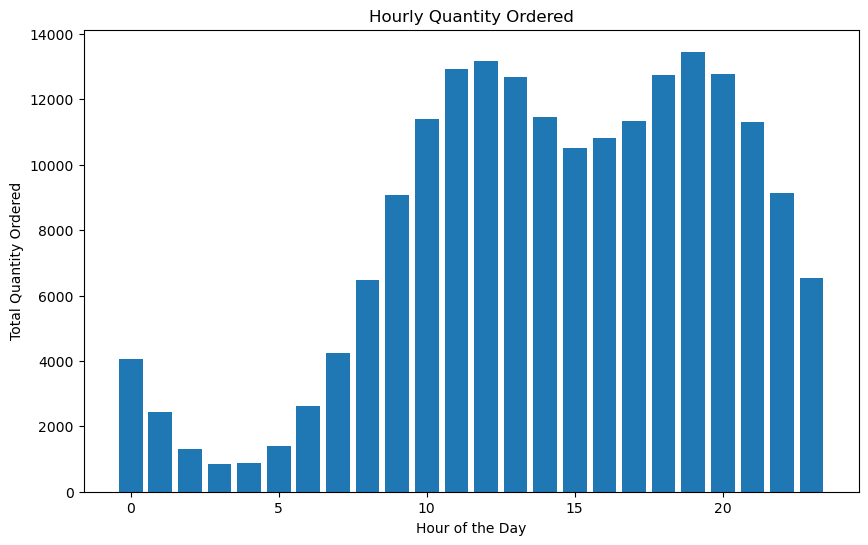

The best time to display advertisements is at 19 o'clock.


In [17]:
df['Order Time'] = pd.to_datetime(df['Order Time'])


df['Hour'] = df['Order Time'].dt.hour


hourly_metrics = df.groupby('Hour').agg({
    'Quantity Ordered': 'sum', 
}).reset_index()

# Data Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(hourly_metrics['Hour'], hourly_metrics['Quantity Ordered'])
plt.xlabel('Hour of the Day')
plt.ylabel('Total Quantity Ordered')
plt.title('Hourly Quantity Ordered')
plt.show()


best_hour = hourly_metrics[hourly_metrics['Quantity Ordered'] == hourly_metrics['Quantity Ordered'].max()]['Hour'].values[0]

print(f"The best time to display advertisements is at {best_hour} o'clock.")
